In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
print(confirmed_df.shape)
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
print(deaths_df.shape)
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')
print(recovered_df.shape)
cases_country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

(264, 87)
(264, 87)
(250, 87)


In [3]:
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 87 columns):
Province/State    82 non-null object
Country/Region    264 non-null object
Lat               264 non-null float64
Long              264 non-null float64
1/22/20           264 non-null int64
1/23/20           264 non-null int64
1/24/20           264 non-null int64
1/25/20           264 non-null int64
1/26/20           264 non-null int64
1/27/20           264 non-null int64
1/28/20           264 non-null int64
1/29/20           264 non-null int64
1/30/20           264 non-null int64
1/31/20           264 non-null int64
2/1/20            264 non-null int64
2/2/20            264 non-null int64
2/3/20            264 non-null int64
2/4/20            264 non-null int64
2/5/20            264 non-null int64
2/6/20            264 non-null int64
2/7/20            264 non-null int64
2/8/20            264 non-null int64
2/9/20            264 non-null int64
2/10/20           264 non-null int64
2/

In [4]:
confirmed_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,21.317326,22.168315,2.102273,2.477273,3.564394,5.431818,8.022727,11.087121,21.128788,23.356061,...,4535.636364,4818.617424,5095.079545,5401.878788,5723.878788,6042.992424,6408.026515,6710.280303,6994.996212,7262.571970
std,24.734994,70.669996,27.382118,27.480921,34.210982,47.612615,66.537101,89.647535,220.011922,221.352587,...,23940.073183,25670.348203,27466.891516,29364.316603,31408.470549,33419.461011,35633.968667,37520.876709,39320.047067,40906.810143
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,6.969250,-20.026050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.750000,21.750000,24.000000,25.750000,27.750000,29.500000,32.000000,33.750000,33.750000,39.500000
50%,23.488100,20.535638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,189.500000,208.500000,221.000000,232.500000,246.000000,254.500000,256.500000,265.500000,276.000000,294.500000
75%,41.166075,78.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,980.250000,1019.500000,1049.750000,1128.750000,1189.250000,1233.750000,1269.250000,1305.500000,1314.250000,1352.000000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,308853.000000,337072.000000,366667.000000,396223.000000,429052.000000,461437.000000,496535.000000,526396.000000,555313.000000,580619.000000


In [5]:
confirmed_df.isnull().sum()

Province/State    182
Country/Region      0
Lat                 0
Long                0
1/22/20             0
1/23/20             0
1/24/20             0
1/25/20             0
1/26/20             0
1/27/20             0
1/28/20             0
1/29/20             0
1/30/20             0
1/31/20             0
2/1/20              0
2/2/20              0
2/3/20              0
2/4/20              0
2/5/20              0
2/6/20              0
2/7/20              0
2/8/20              0
2/9/20              0
2/10/20             0
2/11/20             0
2/12/20             0
2/13/20             0
2/14/20             0
2/15/20             0
2/16/20             0
                 ... 
3/15/20             0
3/16/20             0
3/17/20             0
3/18/20             0
3/19/20             0
3/20/20             0
3/21/20             0
3/22/20             0
3/23/20             0
3/24/20             0
3/25/20             0
3/26/20             0
3/27/20             0
3/28/20             0
3/29/20   

In [6]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 87 columns):
Province/State    82 non-null object
Country/Region    264 non-null object
Lat               264 non-null float64
Long              264 non-null float64
1/22/20           264 non-null int64
1/23/20           264 non-null int64
1/24/20           264 non-null int64
1/25/20           264 non-null int64
1/26/20           264 non-null int64
1/27/20           264 non-null int64
1/28/20           264 non-null int64
1/29/20           264 non-null int64
1/30/20           264 non-null int64
1/31/20           264 non-null int64
2/1/20            264 non-null int64
2/2/20            264 non-null int64
2/3/20            264 non-null int64
2/4/20            264 non-null int64
2/5/20            264 non-null int64
2/6/20            264 non-null int64
2/7/20            264 non-null int64
2/8/20            264 non-null int64
2/9/20            264 non-null int64
2/10/20           264 non-null int64
2/

In [7]:
deaths_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,21.317326,22.168315,0.064394,0.068182,0.098485,0.159091,0.212121,0.310606,0.496212,0.503788,...,244.719697,262.780303,282.443182,310.094697,334.613636,361.571970,388.352273,410.996212,432.162879,452.583333
std,24.734994,70.669996,1.046278,1.047853,1.479183,2.462894,3.201783,4.678456,7.693263,7.693757,...,1432.168421,1521.482461,1620.151924,1757.472055,1881.696578,2019.835839,2162.976556,2289.544937,2399.502564,2511.182960
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,6.969250,-20.026050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,23.488100,20.535638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.500000,4.000000,4.000000,4.500000
75%,41.166075,78.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.250000,18.000000,19.000000,21.250000,22.000000,23.000000,24.000000,24.250000,25.250000,27.250000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,15362.000000,15887.000000,16523.000000,17127.000000,17669.000000,18279.000000,18849.000000,20463.000000,22020.000000,23529.000000


In [8]:
deaths_df.isnull().sum()

Province/State    182
Country/Region      0
Lat                 0
Long                0
1/22/20             0
1/23/20             0
1/24/20             0
1/25/20             0
1/26/20             0
1/27/20             0
1/28/20             0
1/29/20             0
1/30/20             0
1/31/20             0
2/1/20              0
2/2/20              0
2/3/20              0
2/4/20              0
2/5/20              0
2/6/20              0
2/7/20              0
2/8/20              0
2/9/20              0
2/10/20             0
2/11/20             0
2/12/20             0
2/13/20             0
2/14/20             0
2/15/20             0
2/16/20             0
                 ... 
3/15/20             0
3/16/20             0
3/17/20             0
3/18/20             0
3/19/20             0
3/20/20             0
3/21/20             0
3/22/20             0
3/23/20             0
3/24/20             0
3/25/20             0
3/26/20             0
3/27/20             0
3/28/20             0
3/29/20   

In [9]:
deaths_df.isnull().sum()

Province/State    182
Country/Region      0
Lat                 0
Long                0
1/22/20             0
1/23/20             0
1/24/20             0
1/25/20             0
1/26/20             0
1/27/20             0
1/28/20             0
1/29/20             0
1/30/20             0
1/31/20             0
2/1/20              0
2/2/20              0
2/3/20              0
2/4/20              0
2/5/20              0
2/6/20              0
2/7/20              0
2/8/20              0
2/9/20              0
2/10/20             0
2/11/20             0
2/12/20             0
2/13/20             0
2/14/20             0
2/15/20             0
2/16/20             0
                 ... 
3/15/20             0
3/16/20             0
3/17/20             0
3/18/20             0
3/19/20             0
3/20/20             0
3/21/20             0
3/22/20             0
3/23/20             0
3/24/20             0
3/25/20             0
3/26/20             0
3/27/20             0
3/28/20             0
3/29/20   

## Using an imputer to replance the NaN values


In [10]:
confirmed_df = confirmed_df.replace(np.nan, '', regex=True)
deaths_df = deaths_df.replace(np.nan, '', regex=True)
recovered_df = recovered_df.replace(np.nan, '', regex=True)
cases_country_df = cases_country_df.replace(np.nan, '', regex=True)

In [11]:
confirmed_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,299,349,367,423,444,484,521,555,607,665
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,333,361,377,383,400,409,416,433,446,467
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,466,501,525,545,564,583,601,601,638,646
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,10,14,16,17,19,19,19,19,19,19


In [12]:
confirmed_df[confirmed_df["Country/Region"] == "Australia"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,93,96,96,96,99,100,103,103,103,102
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2493,2580,2637,2686,2734,2773,2822,2857,2857,2863
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,26,27,28,28,28,28,28,28,28,28
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,900,907,921,934,943,953,965,974,983,987
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,407,407,411,411,415,420,428,429,429,429
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,80,82,86,89,98,111,122,133,133,144
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,1115,1135,1158,1191,1212,1228,1241,1265,1268,1281
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,436,453,460,460,481,495,506,514,514,517


In [13]:
confirmed_df[confirmed_df["Country/Region"] == "India"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
131,,India,21.0,78.0,0,0,0,0,0,0,...,3082,3588,4778,5311,5916,6725,7598,8446,9205,10453


In [14]:
confirmed_df["Country/Region"].nunique()

185

In [15]:
cases_country_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

## Exploratory Data Analysis COVID-19

For Case Count - Global Summary

In [16]:
global_data = cases_country_df.copy().drop(['Lat','Long_','Country_Region','Last_Update','People_Tested',
                                            'People_Hospitalized','Mortality_Rate','UID','ISO3'], axis=1)
global_summary = pd.DataFrame(global_data.sum()).transpose()
# global_summary.style.format("{:,.Of}")

In [17]:
global_summary

,Confirmed,Deaths,Recovered,Active
0,1982939,126761,493805,1362373


# For Chart 1 : Total Confirmed Corona Virus Cases(Globally)

In [18]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [19]:
confirmed_ts = confirmed_df.copy().drop(['Province/State','Country/Region','Lat','Long'], axis=1)
confirmed_ts_summary = confirmed_ts.sum()

In [20]:
confirmed_ts_summary

1/22/20        555
1/23/20        654
1/24/20        941
1/25/20       1434
1/26/20       2118
1/27/20       2927
1/28/20       5578
1/29/20       6166
1/30/20       8234
1/31/20       9927
2/1/20       12038
2/2/20       16787
2/3/20       19881
2/4/20       23892
2/5/20       27635
2/6/20       30794
2/7/20       34391
2/8/20       37120
2/9/20       40150
2/10/20      42762
2/11/20      44802
2/12/20      45221
2/13/20      60368
2/14/20      66885
2/15/20      69030
2/16/20      71224
2/17/20      73258
2/18/20      75136
2/19/20      75639
2/20/20      76197
            ...   
3/15/20     167454
3/16/20     181574
3/17/20     197102
3/18/20     214821
3/19/20     242570
3/20/20     272208
3/21/20     304507
3/22/20     336953
3/23/20     378235
3/24/20     418045
3/25/20     467653
3/26/20     529591
3/27/20     593291
3/28/20     660693
3/29/20     720140
3/30/20     782389
3/31/20     857487
4/1/20      932605
4/2/20     1013466
4/3/20     1095917
4/4/20     1197408
4/5/20     1

## India's Corona virus live ticker 

In [21]:
from IPython.display import HTML

In [22]:
HTML('<img alt="File:COVID-19 India Total Cases Animated Map.gif" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/COVID-19_India_Total_Cases_Animated_Map.gif/527px-COVID-19_India_Total_Cases_Animated_Map.gif" decoding="async" srcset="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/COVID-19_India_Total_Cases_Animated_Map.gif/791px-COVID-19_India_Total_Cases_Animated_Map.gif 1.5x, https://upload.wikimedia.org/wikipedia/commons/9/95/COVID-19_India_Total_Cases_Animated_Map.gif 2x" data-file-width="1024" data-file-height="1165" width="527" height="600">')

# For the country level drill down

In [24]:
cases_country_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [25]:
cases_country_df.copy().drop(['Lat','Long_','Last_Update'], axis=1).sort_values('Confirmed', ascending=False).reset_index(drop=True).style.bar(align='left',width=98,color='#d65f5f')
                                                                    

In [26]:
cases_country_df.copy().drop(['Lat','Long_','Last_Update'], axis=1).sort_values('Recovered', ascending=False).reset_index(drop=True).style.bar(align='left',width=98,color='#d65f5f')
                                                                    

In [27]:
from matplotlib import style

In [31]:
confirmed_India_ts = confirmed_df[confirmed_df["Country/Region"] == "India"]
confirmed_India_ts = confirmed_India_ts.drop(['Lat','Long','Country/Region','Province/State'], axis=1).reset_index(drop=True).sum()

recovered_India_ts = recovered_df[recovered_df['Country/Region'] == "India"]
recovered_India_ts = recovered_India_ts.drop(['Lat','Long','Country/Region','Province/State'], axis=1).reset_index(drop=True).sum()

deaths_India_ts = deaths_df[deaths_df["Country/Region"] == "India"]
deaths_India_ts = deaths_India_ts.drop(['Lat','Long','Country/Region','Province/State'], axis=1).reset_index(drop=True).sum()

# recovered_India_ts = a[recovered_df['Country/Region'] == "India"]
# recovered_India_ts = recovered_India_ts.drop(['Lat','Long','Country/Region','Province/State'], axis=1).reset_index(drop=True).sum()

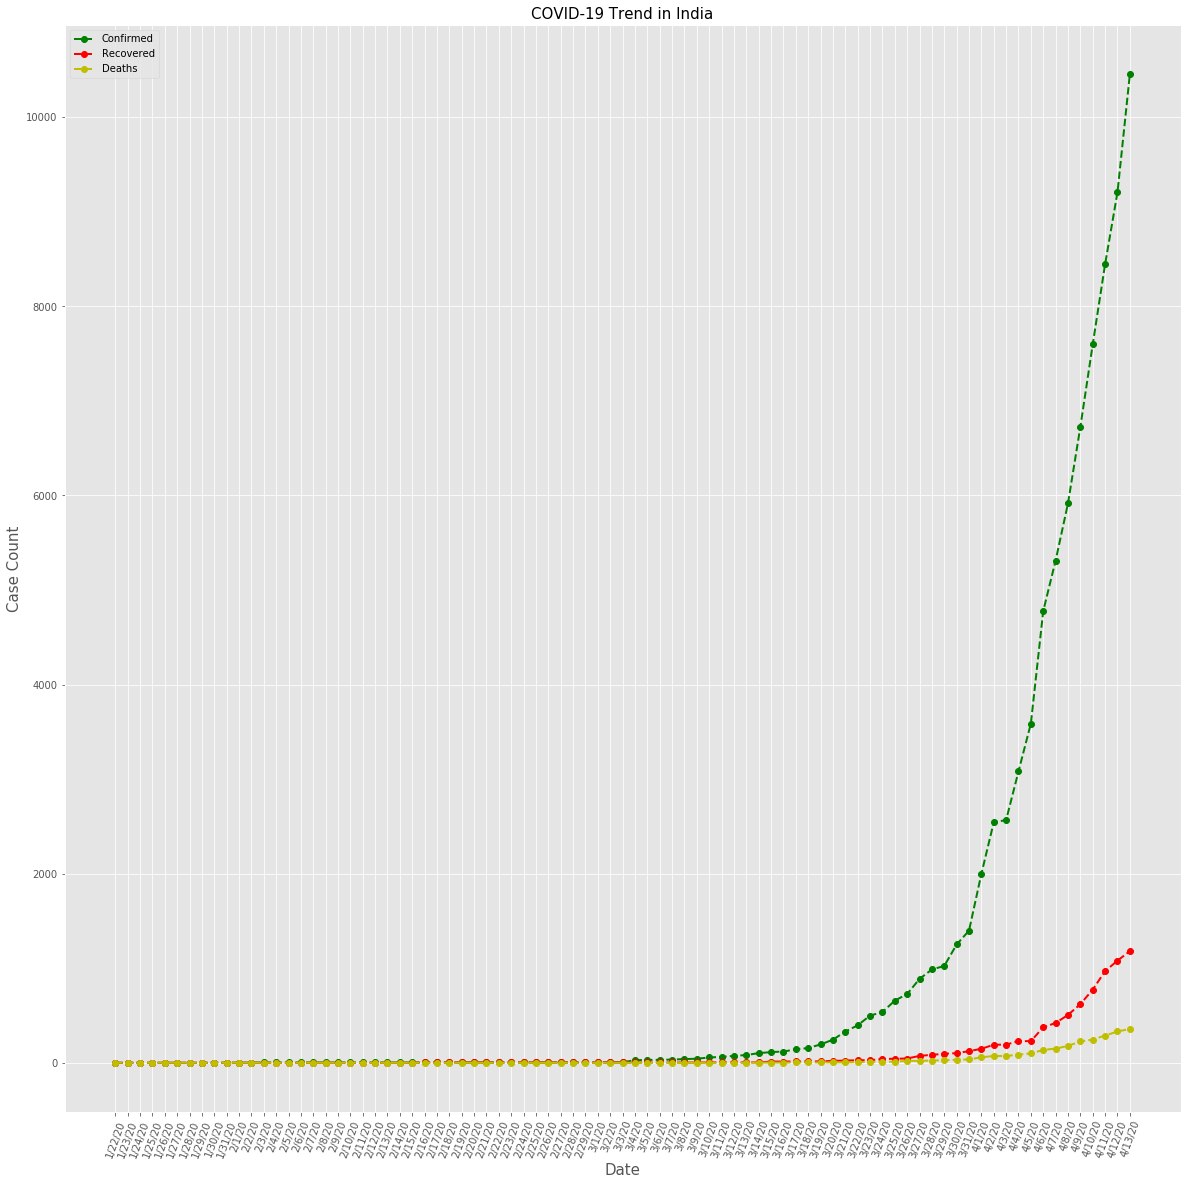

In [43]:
plt.figure(figsize=(20,20))

style.use('ggplot')

plt.plot(confirmed_India_ts, color = 'g', marker = 'o', linestyle = '--' ,linewidth = 2, label = "Confirmed")

plt.plot(recovered_India_ts, color = 'r', marker = 'o', linestyle = '--' ,linewidth = 2, label = "Recovered")

plt.plot(deaths_India_ts, color = 'y', marker = 'o', linestyle = '--' ,linewidth = 2, label = "Deaths")

# plt.plot(recovered_India_ts, color = 'g', marker = 'o', linestyle = '--' ,linewidth = 2, label = "Delhi temp")

plt.title("COVID-19 Trend in India", fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Case Count",fontsize=15)
plt.legend(loc = 0)
plt.xticks(rotation=70)

plt.show()